In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [27]:
# K-means step1
def k_means_step1(img, Class=5):
    #  get shape
    H, W, C = img.shape

    # initiate random seed
    np.random.seed(0)

    # reshape
    img = np.reshape(img, (H * W, -1))

    # select one index randomly
    i = np.random.choice(np.arange(H * W), Class, replace=False)
    Cs = img[i].copy()

    print(Cs)

    clss = np.zeros((H * W), dtype=int)

    # each pixel
    for i in range(H * W):
        # get distance from base pixel
        dis = np.sqrt(np.sum((Cs - img[i]) ** 2, axis=1))
        # get argmin distance
        clss[i] = np.argmin(dis)

    # show
    out = np.reshape(clss, (H, W)) * 50
    out = out.astype(np.uint8)

    return out

1.画像からランダムにK個のRGB成分をサンプリングする。（これをクラスと呼ぶことにする。）

2.画像のそれぞれの画素に対して色の距離が最小となるクラスのインデックスを割り振る。

[[140. 121. 148.]
 [135. 109. 122.]
 [211. 189. 213.]
 [135.  86.  84.]
 [118.  99.  96.]]


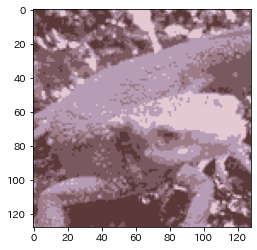

In [28]:
# read image
img = cv2.imread("../assets/imori.jpg").astype(np.float32)

# K-means step1
out_1 = k_means_step1(img)

plt.imshow(out, cmap="gray")

In [29]:
def k_means(img, Class=5):
    # get shape
    H, W, C = img.shape

    # initiate random seed
    np.random.seed(0)

    # reshape image
    img = np.reshape(img, (H * W, -1))

    # get index randomly
    i = np.random.choice(np.arange(H * W), Class, replace=False)
    Cs = img[i].copy()

    while True:
        # prepare pixel class label
        clss = np.zeros((H * W), dtype=int)
        
        # each pixel
        for i in range(H * W):
            # get distance from index pixel
            dis = np.sqrt(np.sum((Cs - img[i])**2, axis=1))
            # get argmin distance
            clss[i] = np.argmin(dis)

        # selected pixel values
        Cs_tmp = np.zeros((Class, 3))
        
        # each class label
        for i in range(Class):
            Cs_tmp[i] = np.mean(img[clss == i], axis=0)

        # if not any change
        if (Cs == Cs_tmp).all():
            break
        else:
            Cs = Cs_tmp.copy()

    # prepare out image
    out = np.zeros((H * W, 3), dtype=np.float32)

    # assign selected pixel values  
    for i in range(Class):
        out[clss == i] = Cs[i]

    print(Cs)
        
    out = np.clip(out, 0, 255)

    # reshape out image
    out = np.reshape(out, (H, W, 3))
    out = out.astype(np.uint8)

    return out

[[182.90548706 156.39289856 181.05880737]
 [157.28413391 124.02828979 136.6774292 ]
 [228.36817932 201.76049805 211.80619812]
 [ 91.52492523  57.49259949  56.78660583]
 [121.73962402  88.02610779  96.16177368]]


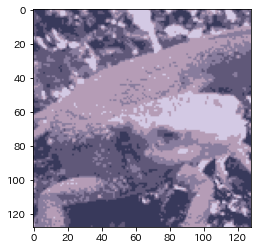

In [30]:
# K-means
out = k_means(img)

plt.imshow(out[:,:,::-1])

3.各インデックスに対応する色成分の平均をRGBそれぞれに対して取り、新たなクラスとする。

4.元のクラスと新しいクラスが全く同じならK-meansを終了する。そうでなければ、新しいクラスを元クラスとして2-3を繰り返す。

5.元画像の各画素で色の距離が最小となるクラスのRGBを割り当てる。